In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv("/content/sorghum_annual_supply_disappearance.csv")

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   marketing_year        49 non-null     object 
 1   period                49 non-null     object 
 2   beginning_stocks      49 non-null     float64
 3   production            49 non-null     float64
 4   imports               49 non-null     float64
 5   total_supply          49 non-null     float64
 6   feed_and_residual     49 non-null     float64
 7   food_seed_industrial  49 non-null     float64
 8   exports               49 non-null     float64
 9   total_domestic_use    49 non-null     float64
 10  total_use             49 non-null     float64
 11  ending_stocks         49 non-null     float64
dtypes: float64(10), object(2)
memory usage: 4.7+ KB


In [105]:
df.head()

,marketing_year,period,beginning_stocks,production,imports,total_supply,feed_and_residual,food_seed_industrial,exports,total_domestic_use,total_use,ending_stocks
0,1976/77,MY September-August,82.3,710.797,0.000,793.097,8.8,2.0,411.082,421.882,253.915,675.797
1,1977/78,MY September-August,117.3,780.944,0.022,898.266,9.4,2.0,447.624,459.024,222.842,681.866
2,1978/79,MY September-August,216.4,731.270,0.002,947.672,9.9,1.8,537.980,549.680,190.092,739.772
3,1979/80,MY September-August,207.9,807.422,0.002,1015.324,10.4,2.0,495.352,507.752,329.672,837.424
4,1980/81,MY September-August,177.9,579.343,0.010,757.253,9.1,2.0,322.594,333.694,293.159,626.853


In [106]:
df['start_Year']=df['marketing_year'].str.split("/").str[0].astype(int)

In [107]:
df['end_year'] = (
    df['start_Year'].astype(str).str[:2] +
    df['marketing_year'].str.split('/').str[1]
).astype(int)

In [108]:
df['duration']=df['end_year']-df['start_Year']

In [109]:
# Create a month to number mapping
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Extract the months from the period column
df['start_month'] = df['period'].str.split().str[-1].str.split('-').str[0]
df['end_month'] = df['period'].str.split().str[-1].str.split('-').str[1]

# Map months to numbers
df['start_month_num'] = df['start_month'].map(month_mapping)
df['end_month_num'] = df['end_month'].map(month_mapping)

# Display the result
df[['period', 'start_month', 'start_month_num', 'end_month', 'end_month_num']].head()

,period,start_month,start_month_num,end_month,end_month_num
0,MY September-August,September,9,August,8
1,MY September-August,September,9,August,8
2,MY September-August,September,9,August,8
3,MY September-August,September,9,August,8
4,MY September-August,September,9,August,8


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   marketing_year        49 non-null     object 
 1   period                49 non-null     object 
 2   beginning_stocks      49 non-null     float64
 3   production            49 non-null     float64
 4   imports               49 non-null     float64
 5   total_supply          49 non-null     float64
 6   feed_and_residual     49 non-null     float64
 7   food_seed_industrial  49 non-null     float64
 8   exports               49 non-null     float64
 9   total_domestic_use    49 non-null     float64
 10  total_use             49 non-null     float64
 11  ending_stocks         49 non-null     float64
 12  start_Year            49 non-null     int64  
 13  end_year              49 non-null     int64  
 14  duration              49 non-null     int64  
 15  start_month           49 

In [111]:
df.head()

,marketing_year,period,beginning_stocks,production,imports,total_supply,feed_and_residual,food_seed_industrial,exports,total_domestic_use,total_use,ending_stocks,start_Year,end_year,duration,start_month,end_month,start_month_num,end_month_num
0,1976/77,MY September-August,82.3,710.797,0.000,793.097,8.8,2.0,411.082,421.882,253.915,675.797,1976,1977,1,September,August,9,8
1,1977/78,MY September-August,117.3,780.944,0.022,898.266,9.4,2.0,447.624,459.024,222.842,681.866,1977,1978,1,September,August,9,8
2,1978/79,MY September-August,216.4,731.270,0.002,947.672,9.9,1.8,537.980,549.680,190.092,739.772,1978,1979,1,September,August,9,8
3,1979/80,MY September-August,207.9,807.422,0.002,1015.324,10.4,2.0,495.352,507.752,329.672,837.424,1979,1980,1,September,August,9,8
4,1980/81,MY September-August,177.9,579.343,0.010,757.253,9.1,2.0,322.594,333.694,293.159,626.853,1980,1981,1,September,August,9,8


In [112]:
df.describe()

,beginning_stocks,production,imports,total_supply,feed_and_residual,food_seed_industrial,exports,total_domestic_use,total_use,ending_stocks,start_Year,end_year,duration,start_month_num,end_month_num
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000,49.000000,49.000000,49.0,49.0
mean,133.741061,541.904714,0.404571,676.050347,41.199265,1.234020,281.566469,323.999755,219.169980,543.169735,2000.00000,1998.959184,-1.040816,9.0,8.0
std,170.900859,207.145263,1.527910,325.841736,33.838722,0.454276,175.237155,157.214520,66.871467,184.516715,14.28869,20.308003,14.285714,0.0,0.0
min,15.153000,187.785000,0.000000,235.070000,5.336000,0.650000,42.478000,75.229000,63.410000,210.833000,1976.00000,1900.000000,-99.000000,9.0,8.0
25%,34.032000,381.605000,0.007000,421.708000,15.300000,0.811000,122.730000,194.380000,190.092000,382.766000,1988.00000,1988.000000,1.000000,9.0,8.0
50%,54.712000,497.445000,0.021000,555.791000,26.000000,1.192000,236.080000,306.996000,212.083000,503.686000,2000.00000,2001.000000,1.000000,9.0,8.0
75%,175.014000,645.741000,0.068000,898.266000,58.387000,1.600000,440.055000,459.024000,259.613000,681.866000,2012.00000,2013.000000,1.000000,9.0,8.0
max,743.333000,1120.271000,9.573000,1489.882000,136.139000,2.300000,663.880000,691.580000,351.749000,869.568000,2024.00000,2025.000000,1.000000,9.0,8.0


In [113]:
num_col = df.select_dtypes(include=[int,float])
num_col.corr()

,beginning_stocks,production,imports,total_supply,feed_and_residual,food_seed_industrial,exports,total_domestic_use,total_use,ending_stocks,start_Year,end_year,duration,start_month_num,end_month_num
beginning_stocks,1.000000,0.483928,-0.152381,0.831420,-0.461671,0.514133,0.681894,0.662180,0.252018,0.655535,-0.579061,-0.366261,0.058519,NaN,NaN
production,0.483928,1.000000,-0.204603,0.888579,-0.504499,0.693985,0.891886,0.887547,0.427977,0.911325,-0.776174,-0.572492,-0.037497,NaN,NaN
imports,-0.152381,-0.204603,1.000000,-0.205304,0.442575,-0.189307,-0.254663,-0.189145,-0.156148,-0.217748,0.237767,0.194255,0.038328,NaN,NaN
total_supply,0.831420,0.888579,-0.205304,1.000000,-0.560788,0.709953,0.923446,0.910655,0.403524,0.922152,-0.796029,-0.555136,0.007035,NaN,NaN
feed_and_residual,-0.461671,-0.504499,0.442575,-0.560788,1.000000,-0.730446,-0.610187,-0.467008,-0.473112,-0.569369,0.690045,0.447011,-0.054736,NaN,NaN
food_seed_industrial,0.514133,0.693985,-0.189307,0.709953,-0.730446,1.000000,0.766939,0.700528,0.403199,0.742999,-0.899725,-0.613846,0.027294,NaN,NaN
exports,0.681894,0.891886,-0.254663,0.923446,-0.610187,0.766939,1.000000,0.985517,0.297605,0.947550,-0.888614,-0.627031,-0.002564,NaN,NaN
total_domestic_use,0.662180,0.887547,-0.189145,0.910655,-0.467008,0.700528,0.985517,1.000000,0.231054,0.935771,-0.844557,-0.604472,-0.014560,NaN,NaN
total_use,0.252018,0.427977,-0.156148,0.403524,-0.473112,0.403199,0.297605,0.231054,1.000000,0.559280,-0.336322,-0.292003,-0.078707,NaN,NaN
ending_stocks,0.655535,0.911325,-0.217748,0.922152,-0.569369,0.742999,0.947550,0.935771,0.559280,1.000000,-0.841479,-0.620856,-0.040930,NaN,NaN


In [114]:
# 1. Supply-Demand Balance Features
df['net_supply'] = df['total_supply'] - df['total_use']
df['supply_demand_ratio'] = df['total_supply'] / df['total_use']
df['self_sufficiency_ratio'] = df['production'] / df['total_domestic_use']

# 2. Trade Balance
df['net_trade'] = df['exports'] - df['imports']
df['trade_ratio'] = df['exports'] / df['imports'].replace(0, np.nan)
df['export_percentage'] = (df['exports'] / df['production']) * 100
df['import_dependency'] = (df['imports'] / df['total_domestic_use']) * 100

# 3. Inventory Management
df['stock_to_use_ratio'] = df['ending_stocks'] / df['total_use']
df['stock_change'] = df['ending_stocks'] - df['beginning_stocks']
df['stock_change_pct'] = (df['stock_change'] / df['beginning_stocks']) * 100

# 4. Production Efficiency
df['production_change'] = df['production'].diff()
df['production_growth_rate'] = df['production'].pct_change() * 100

# 5. Feed vs Food Competition
df['feed_percentage'] = (df['feed_and_residual'] / df['total_domestic_use']) * 100
df['food_percentage'] = (df['food_seed_industrial'] / df['total_domestic_use']) * 100

# 6. Time-based features
df['decade'] = (df['start_Year'] // 10) * 10

# 7. Moving Averages (3-year and 5-year)
df['production_ma3'] = df['production'].rolling(window=3, min_periods=1).mean()
df['production_ma5'] = df['production'].rolling(window=5, min_periods=1).mean()
df['supply_ma3'] = df['total_supply'].rolling(window=3, min_periods=1).mean()


In [115]:
print("\n TRADE BALANCE:")
print(f"   Average Net Trade: {df['net_trade'].mean():,.0f} units")
print(f"   Years as Net Exporter: {(df['net_trade'] > 0).sum()}/{len(df)}")
print(f"   Average Export %: {df['export_percentage'].mean():.1f}%")
print(f"   Average Import Dependency: {df['import_dependency'].mean():.1f}%")



 TRADE BALANCE:
   Average Net Trade: 281 units
   Years as Net Exporter: 49/49
   Average Export %: 48.1%
   Average Import Dependency: 0.2%


In [116]:
print("\n PRODUCTION ANALYSIS:")
print(f"   Average Annual Production: {df['production'].mean():,.0f} units")
print(f"   Production Growth (Total): {((df['production'].iloc[-1] / df['production'].iloc[0]) - 1) * 100:.1f}%")
print(f"   Average Annual Growth Rate: {df['production_growth_rate'].mean():.2f}%")
print(f"   Most Volatile Decade (by std): {df.groupby('decade')['production'].std().idxmax()}s")



 PRODUCTION ANALYSIS:
   Average Annual Production: 542 units
   Production Growth (Total): -51.6%
   Average Annual Growth Rate: 3.37%
   Most Volatile Decade (by std): 1980s


In [117]:
print("\n INVENTORY MANAGEMENT:")
print(f"   Average Stock-to-Use Ratio: {df['stock_to_use_ratio'].mean():.3f}")
print(f"   Average Stock Change: {df['stock_change'].mean():,.0f} units")



 INVENTORY MANAGEMENT:
   Average Stock-to-Use Ratio: 2.579
   Average Stock Change: 409 units


In [118]:
print("\n USAGE PATTERNS:")
print(f"   Feed Usage: {df['feed_percentage'].mean():.1f}%")
print(f"   Food/Industrial Usage: {df['food_percentage'].mean():.1f}%")



 USAGE PATTERNS:
   Feed Usage: 18.8%
   Food/Industrial Usage: 0.4%


In [119]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 24)

fig = plt.figure(figsize=(18, 24))


<Figure size 1800x2400 with 0 Axes>

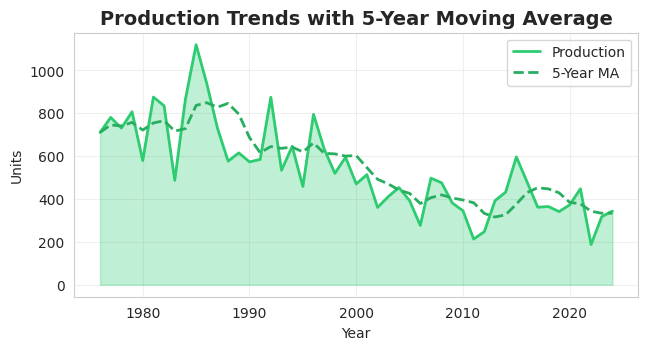

In [120]:
ax1 = plt.subplot(6, 2, 1)
ax1.plot(df['start_Year'], df['production'], label='Production', linewidth=2, color='#2ecc71')
ax1.plot(df['start_Year'], df['production_ma5'], label='5-Year MA', linewidth=2,
         linestyle='--', color='#27ae60')
ax1.fill_between(df['start_Year'], df['production'], alpha=0.3, color='#2ecc71')
ax1.set_title('Production Trends with 5-Year Moving Average', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Units')
ax1.legend()
ax1.grid(True, alpha=0.3)


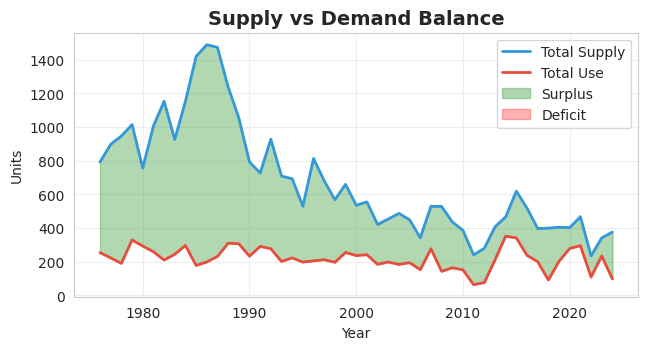

In [121]:
ax2 = plt.subplot(6, 2, 2)
ax2.plot(df['start_Year'], df['total_supply'], label='Total Supply', linewidth=2, color='#3498db')
ax2.plot(df['start_Year'], df['total_use'], label='Total Use', linewidth=2, color='#e74c3c')
ax2.fill_between(df['start_Year'], df['total_supply'], df['total_use'],
                  where=(df['total_supply'] >= df['total_use']), alpha=0.3,
                  color='green', label='Surplus')
ax2.fill_between(df['start_Year'], df['total_supply'], df['total_use'],
                  where=(df['total_supply'] < df['total_use']), alpha=0.3,
                  color='red', label='Deficit')
ax2.set_title('Supply vs Demand Balance', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Units')
ax2.legend()
ax2.grid(True, alpha=0.3)

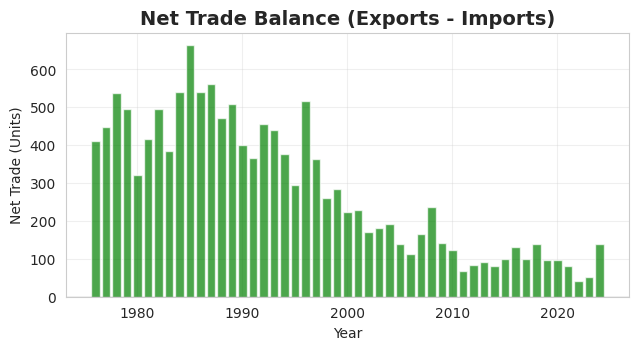

In [122]:
ax3 = plt.subplot(6, 2, 3)
colors = ['green' if x > 0 else 'red' for x in df['net_trade']]
ax3.bar(df['start_Year'], df['net_trade'], color=colors, alpha=0.7)
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax3.set_title('Net Trade Balance (Exports - Imports)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Net Trade (Units)')
ax3.grid(True, alpha=0.3)


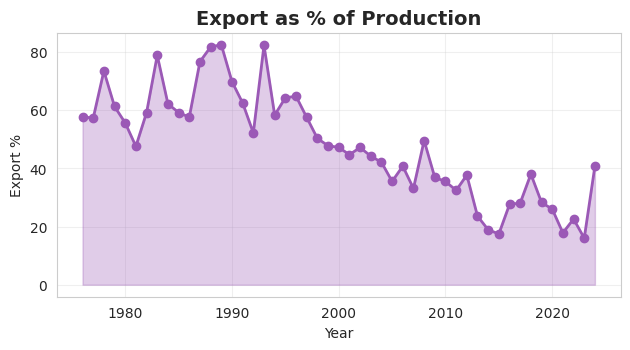

In [123]:
ax4 = plt.subplot(6, 2, 4)
ax4.plot(df['start_Year'], df['export_percentage'], linewidth=2, color='#9b59b6', marker='o')
ax4.fill_between(df['start_Year'], df['export_percentage'], alpha=0.3, color='#9b59b6')
ax4.set_title('Export as % of Production', fontsize=14, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Export %')
ax4.grid(True, alpha=0.3)


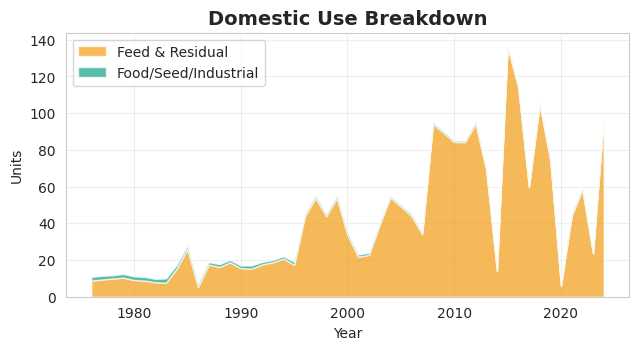

In [124]:
ax6 = plt.subplot(6, 2, 6)
ax6.stackplot(df['start_Year'],
              df['feed_and_residual'],
              df['food_seed_industrial'],
              labels=['Feed & Residual', 'Food/Seed/Industrial'],
              colors=['#f39c12', '#16a085'],
              alpha=0.7)
ax6.set_title('Domestic Use Breakdown', fontsize=14, fontweight='bold')
ax6.set_xlabel('Year')
ax6.set_ylabel('Units')
ax6.legend(loc='upper left')
ax6.grid(True, alpha=0.3)


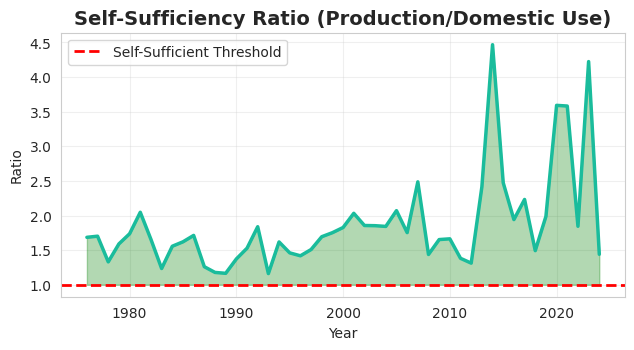

In [125]:
ax7 = plt.subplot(6, 2, 7)
ax7.plot(df['start_Year'], df['self_sufficiency_ratio'], linewidth=2.5, color='#1abc9c')
ax7.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Self-Sufficient Threshold')
ax7.fill_between(df['start_Year'], df['self_sufficiency_ratio'], 1,
                  where=(df['self_sufficiency_ratio'] >= 1), alpha=0.3, color='green')
ax7.fill_between(df['start_Year'], df['self_sufficiency_ratio'], 1,
                  where=(df['self_sufficiency_ratio'] < 1), alpha=0.3, color='red')
ax7.set_title('Self-Sufficiency Ratio (Production/Domestic Use)', fontsize=14, fontweight='bold')
ax7.set_xlabel('Year')
ax7.set_ylabel('Ratio')
ax7.legend()
ax7.grid(True, alpha=0.3)


In [126]:
boom_years = df[df['production_growth_rate'] > df['production_growth_rate'].quantile(0.9)]['start_Year'].values
print(f"\n BOOM YEARS (Top 10% Production Growth):")
print(f"   Years: {list(boom_years)}")



 BOOM YEARS (Top 10% Production Growth):
   Years: [np.int64(1984), np.int64(1996), np.int64(2007), np.int64(2013), np.int64(2023)]


In [127]:
early_import_dep = df[df['start_Year'] < 1990]['import_dependency'].mean()
recent_import_dep = df[df['start_Year'] >= 2000]['import_dependency'].mean()
print(f"\n TRADE DEPENDENCY SHIFT:")
print(f"   Pre-1990 Import Dependency: {early_import_dep:.2f}%")
print(f"   Post-2000 Import Dependency: {recent_import_dep:.2f}%")
print(f"   Change: {recent_import_dep - early_import_dep:+.2f}%")



 TRADE DEPENDENCY SHIFT:
   Pre-1990 Import Dependency: 0.01%
   Post-2000 Import Dependency: 0.39%
   Change: +0.38%


In [128]:
early_feed_pct = df[df['start_Year'] < 1990]['feed_percentage'].mean()
recent_feed_pct = df[df['start_Year'] >= 2000]['feed_percentage'].mean()
print(f"\n FEED USAGE TREND:")
print(f"   Pre-1990 Feed Usage: {early_feed_pct:.1f}%")
print(f"   Post-2000 Feed Usage: {recent_feed_pct:.1f}%")
print(f"   Change: {recent_feed_pct - early_feed_pct:+.1f}%")



 FEED USAGE TREND:
   Pre-1990 Feed Usage: 2.4%
   Post-2000 Feed Usage: 32.4%
   Change: +30.0%
